<a href="https://colab.research.google.com/github/Tan-Yu/BirD/blob/main/GWU_NN_Project_To_Be_Submitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats and Dogs

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7qWbVQEyrrOmqn5a34Ik")
project = rf.workspace("roboflow-100").project("furniture-ngpea")
dataset = project.version(2).download("tensorflow")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to furniture-2 in tensorflow:: 100%|██████████| 697/697 [00:00<00:00, 3965.27it/s]


In [3]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import pandas as pd

# # Set your data path
# data_path = "/content/furniture-2"

# # Set your input image dimensions
# input_shape = (1200, 1200, 3)

# # Define your model
# model = Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(4, activation='linear')  # Output layer with 4 nodes for bounding box coordinates (x, y, width, height)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Image data generator for data augmentation and normalization
# datagen = ImageDataGenerator(rescale=1./255)

# # Loading the data using flow_from_dataframe
# batch_size = 32

# train_generator = datagen.flow_from_dataframe(
#     dataframe=pd.read_csv(os.path.join(data_path, 'train/_annotations.csv')),
#     directory=os.path.join(data_path, 'train'),
#     x_col="filename",
#     y_col=["xmin", "ymin", "xmax", "ymax"],
#     target_size=(1200, 1200),
#     batch_size=batch_size,
#     class_mode='raw'
# )

# valid_generator = datagen.flow_from_dataframe(
#     dataframe=pd.read_csv(os.path.join(data_path, 'valid/_annotations.csv')),
#     directory=os.path.join(data_path, 'valid'),
#     x_col="filename",
#     y_col=["xmin", "ymin", "xmax", "ymax"],
#     target_size=(1200, 1200),
#     batch_size=batch_size,
#     class_mode='raw'
# )

# # Train the model
# model.fit(train_generator, epochs=10, validation_data=valid_generator)

# # Save the trained model
# # model.save("soccer_player_bbox_model.h5")


In [41]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the path to your dataset
data_path = "/content/furniture-2"

# Load annotations from CSV files
train_annotations = pd.read_csv(os.path.join(data_path, "train", "_annotations.csv"))
valid_annotations = pd.read_csv(os.path.join(data_path, "valid", "_annotations.csv"))

# Rescale bounding box coordinates based on the new image size
def rescale_bbox(row):
    width_ratio = 300 / row['width']
    height_ratio = 300 / row['height']
    row['xmin'] *= width_ratio
    row['xmax'] *= width_ratio
    row['ymin'] *= height_ratio
    row['ymax'] *= height_ratio
    return row

train_annotations = train_annotations.apply(rescale_bbox, axis=1)
valid_annotations = valid_annotations.apply(rescale_bbox, axis=1)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create custom data generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_annotations,
    directory=os.path.join(data_path, "train"),
    x_col="filename",
    y_col=["xmin", "ymin", "xmax", "ymax"],
    target_size=(300, 300),
    batch_size=32,
    class_mode="raw",  # Use "raw" for regression tasks
    subset="training"
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_annotations,
    directory=os.path.join(data_path, "valid"),
    x_col="filename",
    y_col=["xmin", "ymin", "xmax", "ymax"],
    target_size=(300, 300),
    batch_size=32,
    class_mode="raw",  # Use "raw" for regression tasks
    subset="validation"
)

# Define and compile the model with smooth L1 loss
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='huber_loss', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_generator, validation_data=valid_generator, epochs=2, callbacks=[early_stopping])


# Train the model
# model.fit(train_generator, validation_data=valid_generator, epochs=20)

model.save("/content/furniture.keras")


Found 364 validated image filenames.
Found 32 validated image filenames.
Epoch 1/2
12/12 [==============================] - 85s 7s/step - loss: 67.2477 - accuracy: 0.4835 - val_loss: 122.4260 - val_accuracy: 0.2500
Epoch 2/2
12/12 [==============================] - 78s 6s/step - loss: 47.4473 - accuracy: 0.5000 - val_loss: 104.2654 - val_accuracy: 0.6250


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


<class 'numpy.ndarray'>
1/1 [==============================] - 0s 122ms/step
TRUE [88.25, 109.25, 273.5, 258.75]
PRED [ 9.977341 26.57757  80.809364 81.405815]


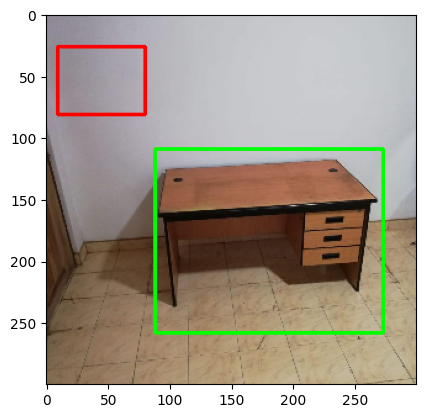

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 119ms/step
TRUE [67.25, 160.25, 256.25, 276.0]
PRED [10.693491 26.58846  81.486534 82.835   ]


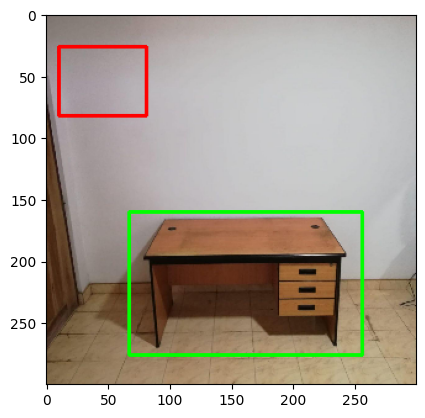

In [71]:
def plot_bounding_boxes(image_array, true_bbox, pred_bbox):
    # Convert image array to uint8 for compatibility with OpenCV
    img = (image_array * 255).astype(np.uint8)

    # True bounding box
    true_xmin, true_ymin, true_xmax, true_ymax = true_bbox
    cv2.rectangle(img, (int(true_xmin), int(true_ymin)), (int(true_xmax), int(true_ymax)), (0, 255, 0), 2)

    # Predicted bounding box
    pred_xmin, pred_ymin, pred_xmax, pred_ymax = pred_bbox
    cv2.rectangle(img, (int(pred_xmin), int(pred_ymin)), (int(pred_xmax), int(pred_ymax)), (255, 0, 0), 2)

    # Invert the y-axis
    # img = cv2.flip(img, 0)

    plt.imshow(img)
    plt.show()

i = 0
for index, row in valid_annotations.iterrows():
    if i == 2:
        break

    image_path = os.path.join(data_path, 'valid', row['filename'])
    true_bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]

    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path)
    print(type(img_array))
    # Predict bounding box
    pred_bbox = model.predict(img_array)[0]

    print("TRUE", true_bbox)
    print("PRED", pred_bbox)

    # Plot true and predicted bounding boxes using img_array
    plot_bounding_boxes(img_array[0], true_bbox, pred_bbox)

    i += 1

Found 364 validated image filenames.
Found 32 validated image filenames.
Epoch 1/3
12/12 [==============================] - ETA: 0s - loss: 78.3964 - accuracy: 0.4231

12/12 [==============================] - 9s 483ms/step - loss: 78.3964 - accuracy: 0.4231 - val_loss: 84.5641 - val_accuracy: 0.2500
Epoch 2/3
12/12 [==============================] - 3s 278ms/step - loss: 53.3499 - accuracy: 0.5659 - val_loss: 94.5320 - val_accuracy: 0.7812
Epoch 3/3
12/12 [==============================] - 3s 276ms/step - loss: 49.1498 - accuracy: 0.4973 - val_loss: 100.3613 - val_accuracy: 0.7500
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 73ms/step
TRUE [88.25, 109.25, 273.5, 258.75]
PRED [16.512196 28.701317 89.646    86.05769 ]


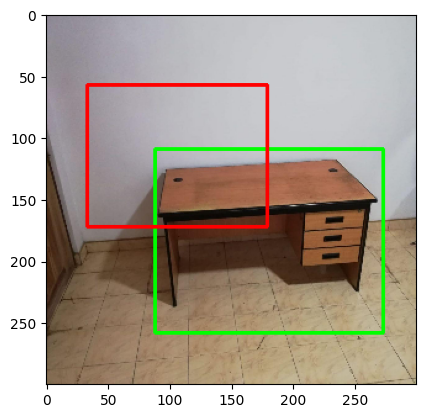

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 18ms/step
TRUE [67.25, 160.25, 256.25, 276.0]
PRED [17.408813 29.11188  90.7052   87.98918 ]


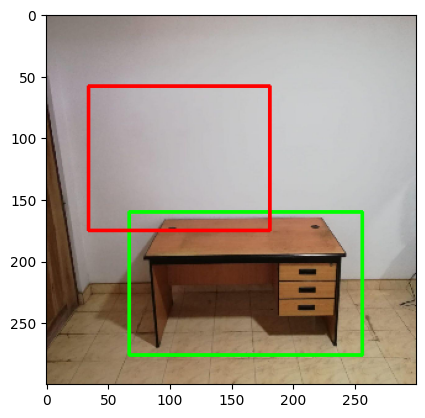

In [7]:
import cv2
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Set the path to your dataset
data_path = "/content/furniture-2"

# Load annotations from CSV files
train_annotations = pd.read_csv(os.path.join(data_path, "train", "_annotations.csv"))
valid_annotations = pd.read_csv(os.path.join(data_path, "valid", "_annotations.csv"))

# Rescale bounding box coordinates based on the new image size
def rescale_bbox(row):
    width_ratio = 300 / row['width']
    height_ratio = 300 / row['height']
    row['xmin'] *= width_ratio
    row['xmax'] *= width_ratio
    row['ymin'] *= height_ratio
    row['ymax'] *= height_ratio
    return row

train_annotations = train_annotations.apply(rescale_bbox, axis=1)
valid_annotations = valid_annotations.apply(rescale_bbox, axis=1)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create custom data generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_annotations,
    directory=os.path.join(data_path, "train"),
    x_col="filename",
    y_col=["xmin", "ymin", "xmax", "ymax"],
    target_size=(300, 300),
    batch_size=32,
    class_mode="raw",  # Use "raw" for regression tasks
    subset="training"
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_annotations,
    directory=os.path.join(data_path, "valid"),
    x_col="filename",
    y_col=["xmin", "ymin", "xmax", "ymax"],
    target_size=(300, 300),
    batch_size=32,
    class_mode="raw",  # Use "raw" for regression tasks
    subset="validation"
)

# Define and compile the model with smooth L1 loss
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='huber_loss', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_generator, validation_data=valid_generator, epochs=3, callbacks=[early_stopping])

def plot_bounding_boxes(image_array, true_bbox, pred_bbox):
    # Convert image array to uint8 for compatibility with OpenCV
    img = (image_array * 255).astype(np.uint8)

    # True bounding box
    true_xmin, true_ymin, true_xmax, true_ymax = true_bbox
    cv2.rectangle(img, (int(true_xmin), int(true_ymin)), (int(true_xmax), int(true_ymax)), (0, 255, 0), 2)

    # Predicted bounding box
    pred_xmin, pred_ymin, pred_xmax, pred_ymax = pred_bbox
    cv2.rectangle(img, (int(pred_xmin), int(pred_ymin)), (int(pred_xmax), int(pred_ymax)), (255, 0, 0), 2)

    # Invert the y-axis
    # img = cv2.flip(img, 0)

    plt.imshow(img)
    plt.show()

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(300, 300))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Normalize the pixel values to [0, 1]


i = 0
for index, row in valid_annotations.iterrows():
    if i == 2:
        break

    image_path = os.path.join(data_path, 'valid', row['filename'])
    true_bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]

    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path)
    print(type(img_array))
    # Predict bounding box
    pred_bbox = model.predict(img_array)[0]

    print("TRUE", true_bbox)
    print("PRED", pred_bbox)

    # Plot true and predicted bounding boxes using img_array
    plot_bounding_boxes(img_array[0], true_bbox, pred_bbox)


    i += 1



# Data Preparation

In [13]:
import cv2
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Set the path to your dataset
data_path = "/content/furniture-2"

# Load annotations from CSV files
train_annotations = pd.read_csv(os.path.join(data_path, "train", "_annotations.csv"))
valid_annotations = pd.read_csv(os.path.join(data_path, "valid", "_annotations.csv"))

# Rescale bounding box coordinates based on the new image size
def rescale_bbox(row):
    width_ratio = 300 / row['width']
    height_ratio = 300 / row['height']
    row['xmin'] *= width_ratio
    row['xmax'] *= width_ratio
    row['ymin'] *= height_ratio
    row['ymax'] *= height_ratio
    return row

train_annotations = train_annotations.apply(rescale_bbox, axis=1)
valid_annotations = valid_annotations.apply(rescale_bbox, axis=1)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create custom data generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_annotations,
    directory=os.path.join(data_path, "train"),
    x_col="filename",
    y_col=["xmin", "ymin", "xmax", "ymax"],
    target_size=(300, 300),
    batch_size=32,
    class_mode="raw",  # Use "raw" for regression tasks
    subset="training"
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_annotations,
    directory=os.path.join(data_path, "valid"),
    x_col="filename",
    y_col=["xmin", "ymin", "xmax", "ymax"],
    target_size=(300, 300),
    batch_size=32,
    class_mode="raw",  # Use "raw" for regression tasks
    subset="validation"
)


Found 364 validated image filenames.
Found 32 validated image filenames.
Epoch 1/30
12/12 [==============================] - 6s 306ms/step - loss: 82.6067 - accuracy: 0.4093 - val_loss: 110.3329 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/30
12/12 [==============================] - 4s 285ms/step - loss: 51.2182 - accuracy: 0.5385 - val_loss: 107.6523 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/30
12/12 [==============================] - 4s 394ms/step - loss: 44.3151 - accuracy: 0.5220 - val_loss: 95.4609 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/30
12/12 [==============================] - 4s 287ms/step - loss: 41.3960 - accuracy: 0.5962 - val_loss: 93.0041 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/30
12/12 [==============================] - 4s 286ms/step - loss: 38.8739 - accuracy: 0.5440 - val_loss: 98.6237 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/30
12/12 [==============================] - 5s 396ms/step - loss: 37.2064 - accuracy: 0.5659 - val_loss: 102.4028 - val_accuracy: 0.

# Defining Model Architecture #1

In [ ]:

# Define and compile the model with smooth L1 loss
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='linear')
])



# Defining Model Architecture #2



In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Add, GlobalAveragePooling2D

# Define input layer
input_layer = Input(shape=(300, 300, 3))

# Feature extraction backbone
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)

# Global average pooling layer
x = GlobalAveragePooling2D()(x)

# Fully connected layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer for bounding box regression
output_layer = Dense(4, activation='linear')(x)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile Model

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='huber_loss', metrics=['accuracy'])

# Hyperparameters

In [ ]:
# Set up early stopping and learning rate schedule
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)


Epoch 1/30
12/12 [==============================] - 7s 422ms/step - loss: 124.4319 - accuracy: 0.3379 - val_loss: 76.7587 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/30
12/12 [==============================] - 5s 397ms/step - loss: 53.6839 - accuracy: 0.4478 - val_loss: 80.2399 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/30
12/12 [==============================] - 5s 395ms/step - loss: 44.9911 - accuracy: 0.5302 - val_loss: 77.4964 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/30
12/12 [==============================] - 3s 265ms/step - loss: 42.5301 - accuracy: 0.5440 - val_loss: 64.6413 - val_accuracy: 0.7500 - lr: 2.0000e-04
Epoch 5/30
 9/12 [=====================>........] - ETA: 0s - loss: 42.2524 - accuracy: 0.4590

# Training Model

In [ ]:
# Train the model with early stopping and learning rate schedule
history = model.fit(train_generator, validation_data=valid_generator, epochs=30, callbacks=[early_stopping, reduce_lr])


# Evaluate Neural Network

In [17]:
def plot_bounding_boxes(image_array, true_bbox, pred_bbox):
    # Convert image array to uint8 for compatibility with OpenCV
    img = (image_array * 255).astype(np.uint8)

    # True bounding box
    true_xmin, true_ymin, true_xmax, true_ymax = true_bbox
    cv2.rectangle(img, (int(true_xmin), int(true_ymin)), (int(true_xmax), int(true_ymax)), (0, 255, 0), 2)

    # Predicted bounding box
    pred_xmin, pred_ymin, pred_xmax, pred_ymax = pred_bbox
    cv2.rectangle(img, (int(pred_xmin), int(pred_ymin)), (int(pred_xmax), int(pred_ymax)), (255, 0, 0), 2)

    # Invert the y-axis
    # img = cv2.flip(img, 0)

    plt.imshow(img)
    plt.show()

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(300, 300))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Normalize the pixel values to [0, 1]


i = 0
for index, row in valid_annotations.iterrows():
    if i == 10:
        break

    image_path = os.path.join(data_path, 'valid', row['filename'])
    true_bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]

    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path)
    # print(type(img_array))
    # Predict bounding box
    pred_bbox = model.predict(img_array)[0]

    print("TRUE", true_bbox)
    print("PRED", pred_bbox)

    # Plot true and predicted bounding boxes using img_array
    # plot_bounding_boxes(img_array[0], true_bbox, pred_bbox)


    i += 1



1/1 [==============================] - 0s 89ms/step
TRUE [88.25, 109.25, 273.5, 258.75]
PRED [ 20.600851  32.126095  99.89957  104.244156]
1/1 [==============================] - 0s 38ms/step
TRUE [67.25, 160.25, 256.25, 276.0]
PRED [ 20.536802  31.953712 100.14371  104.767815]
1/1 [==============================] - 0s 30ms/step
TRUE [6.0, 36.5, 294.5, 252.5]
PRED [ 21.137133  37.03961  120.45918  122.57504 ]
1/1 [==============================] - 0s 33ms/step
TRUE [0.75, 83.5, 299.5, 215.25]
PRED [ 20.557936  37.556156 117.08698  119.01129 ]
1/1 [==============================] - 0s 37ms/step
TRUE [34.5, 94.75, 257.25, 245.5]
PRED [ 24.606884  41.27612  129.75941  133.42792 ]
1/1 [==============================] - 0s 51ms/step
TRUE [5.5, 111.25, 286.0, 236.25]
PRED [ 19.100462  37.49963  111.67442  114.370895]
1/1 [==============================] - 0s 35ms/step
TRUE [6.0, 81.0, 288.25, 288.25]
PRED [ 20.220188  34.096687 105.217514 108.36466 ]
1/1 [==============================] - 0s 